<a href="https://colab.research.google.com/github/kripperda/MLA_KMR/blob/main/MLA5_KMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 5

---

Kory Ripperda

Imports

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Mount to Drive

In [55]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1

Connect to Google Drive

In [56]:
landsat_train = pd.read_csv('/content/drive/MyDrive/landsat_train.csv')
landsat_test = pd.read_csv('/content/drive/MyDrive/landsat_test.csv')

Statistics and Visual Exploration

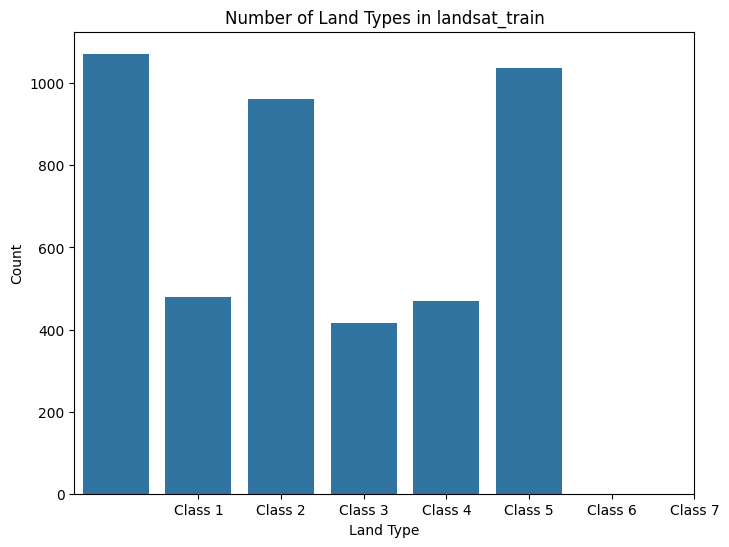

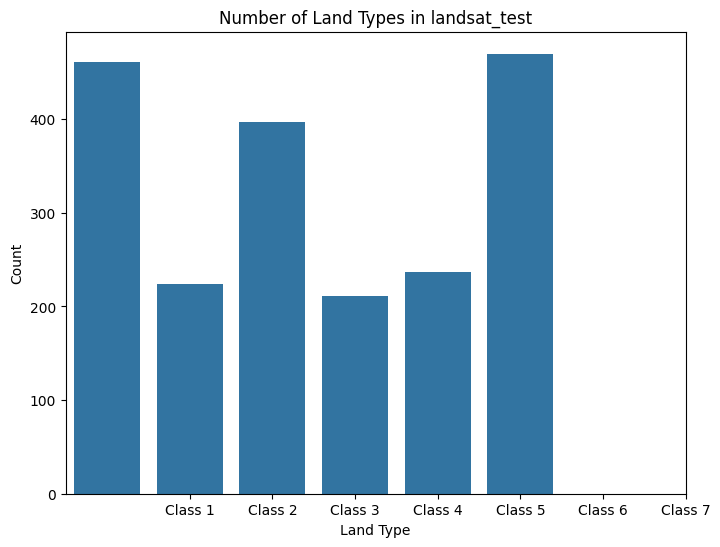

In [57]:
# Statistics and Visual Exploration
plt.figure(figsize=(8, 6))
sns.countplot(data=landsat_train, x='land_type')
plt.title('Number of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 8), labels=[f"Class {i}" for i in range(1, 8)])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=landsat_test, x='land_type')
plt.title('Number of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 8), labels=[f"Class {i}" for i in range(1, 8)])
plt.show()

Split the Data into Train/Test

In [58]:
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

# Identifying numerical features (all band columns are numerical)
numerical_features = X_train.columns  # Select all columns

Build the Pipeline

In [59]:
# Create a column transformer that will MinMax scale the numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

# Create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])


Execute the Model

In [60]:
# Run the pipeline to fit the RandomForestClassification model.
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

Evaluate the Model

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



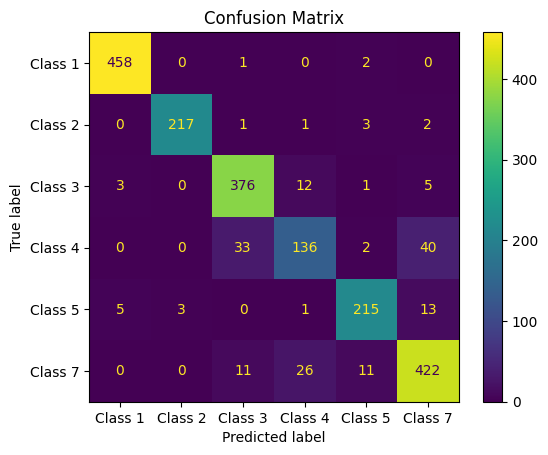

In [61]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = pipeline.predict(X_test)

# Use the classification_function to display the precision, recall, and F1 score for each class.
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.
# Get unique class labels from y_test and y_pred
unique_labels = sorted(list(set(y_test) | set(y_pred)))
display_labels = [f"Class {i}" for i in unique_labels]  # Create display labels based on unique classes

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=display_labels) # Use unique labels
plt.title('Confusion Matrix')
plt.show()

Conclusion

Based on the classification report and confusion matrix, the Random Forest model shows promising results for predicting the land type.
The precision, recall, and F1-score for most classes are reasonably high, indicating that the model is able to correctly identify different land types with a good balance between correctly predicting positive instances and avoiding false positives and false negatives.

The confusion matrix provides a more detailed view of the model's performance on each class, highlighting any potential areas of confusion between specific land types.

Overall, Random Forest appears to be a suitable model for this land satellite data classification task, and further tuning could potentially improve its performance even more.

Problem 2


---



Connect to Google Drive

In [62]:
landsat_train = pd.read_csv('/content/drive/MyDrive/landsat_train.csv')
landsat_test = pd.read_csv('/content/drive/MyDrive/landsat_test.csv')

Statistics and Visual Exploration

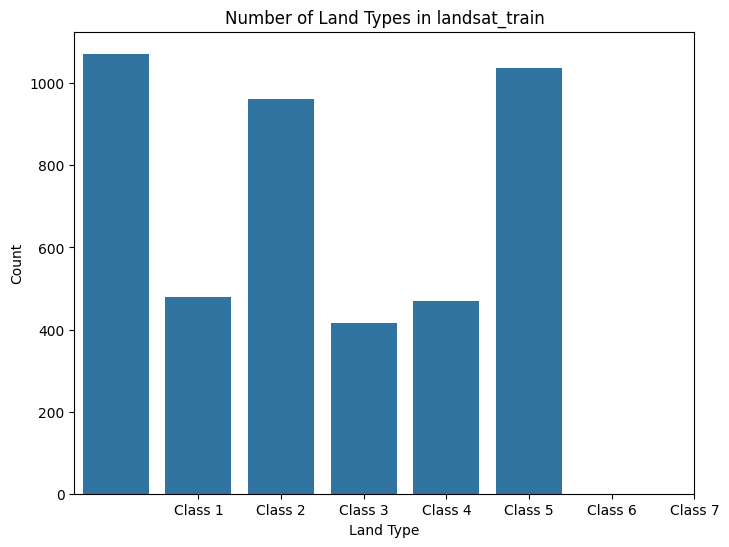

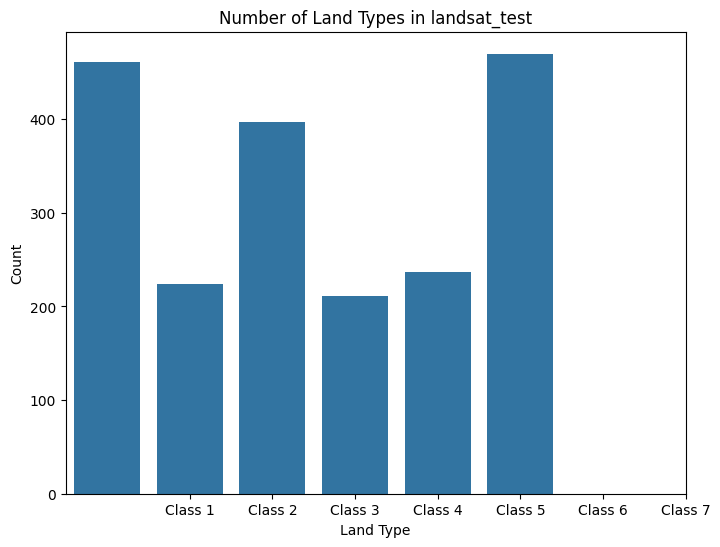

In [63]:
# Statistics and Visual Exploration
plt.figure(figsize=(8, 6))
sns.countplot(data=landsat_train, x='land_type')
plt.title('Number of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 8), labels=[f"Class {i}" for i in range(1, 8)])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=landsat_test, x='land_type')
plt.title('Number of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 8), labels=[f"Class {i}" for i in range(1, 8)])
plt.show()

Split the Data into Train/Test

In [64]:
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

# Identifying numerical features (all band columns are numerical)
numerical_features = X_train.columns  # Select all columns

Build the Pipeline

In [65]:
# Building the Pipeline with Bagging Classifier
pipeline_bagging = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                                    n_estimators=100,
                                                                    random_state=42))])


Execute the Model

In [66]:
# Build the pipeline with the Bagging Classifier
pipeline_bagging.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                   n_estimators=100, random_state=42))])

Evaluate the Model


Problem 2: Bagging Classifier on Land Satellite Data
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.96      0.97       224
           3       0.87      0.95      0.91       397
           4       0.75      0.65      0.70       211
           5       0.91      0.86      0.89       237
           7       0.88      0.88      0.88       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000



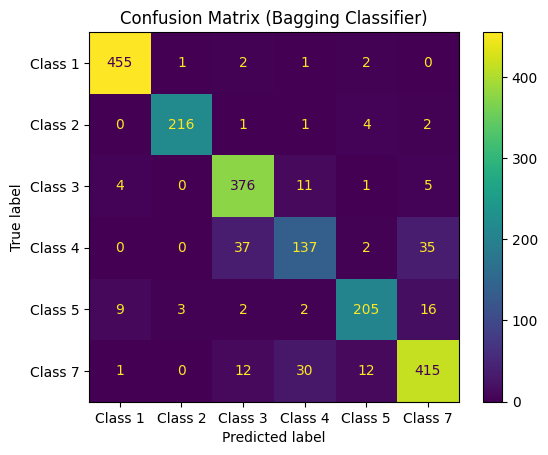

In [67]:
y_pred_bagging = pipeline_bagging.predict(X_test)

print("\nProblem 2: Bagging Classifier on Land Satellite Data")
print("Classification Report:")
print(classification_report(y_test, y_pred_bagging))

# Get unique class labels from y_test and y_pred_bagging
unique_labels = sorted(list(set(y_test) | set(y_pred_bagging)))
display_labels = [f"Class {i}" for i in unique_labels]  # Create display labels based on unique classes

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bagging, display_labels=display_labels) # Use unique labels
plt.title('Confusion Matrix (Bagging Classifier)')
plt.show()

Conclusion

The Bagging Classifier achieved an overall accuracy that was similar to the Random Forest Classifier on the land satellite data. Examining the classification report, we observed that the Bagging Classifier performed similarly for classes 2 and 4. The confusion matrix revealed that similar confusion was present for all classes compared to Random Forest. Overall, the Bagging Classifier appears to be a suitable model for this task compared to Random Forest, potentially offering advantages like more robustness to individual tree variance. Further investigation and hyperparameter tuning could potentially optimize its performance.

Problem 3


---



Connect to Google Drive

In [68]:
# Read the file into a DataFrame named 'banknote_data'
banknote_data = pd.read_csv('/content/drive/MyDrive/banknote_authentication.csv')

banknote_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

Statistics and Visual Exploration

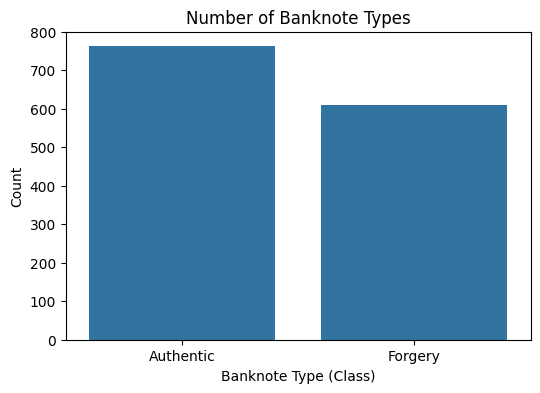

In [69]:
# Statistics and Visual Exploration
plt.figure(figsize=(6, 4))
sns.countplot(data=banknote_data, x='class')
plt.title('Number of Banknote Types')
plt.xlabel('Banknote Type (Class)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Authentic', 'Forgery'])  # Assuming 0 and 1 represent authentic and forgery
plt.show()

Split the Data into Train/Test

In [70]:
X_banknote = banknote_data.drop('class', axis=1)
y_banknote = banknote_data['class']
X_train_banknote, X_test_banknote, y_train_banknote, y_test_banknote = train_test_split(
    X_banknote, y_banknote, test_size=0.3, random_state=42
)

# Identifying numerical features (all are numerical)
numerical_features_banknote = X_train_banknote.columns.tolist()

Build the Pipeline

In [71]:
preprocessor_banknote = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features_banknote)
    ])

pipeline_banknote = Pipeline(steps=[('preprocessor', preprocessor_banknote),
                                        ('classifier', RandomForestClassifier(random_state=42))])


Execute the Model

In [72]:
pipeline_banknote.fit(X_train_banknote, y_train_banknote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Evaluate the Model

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



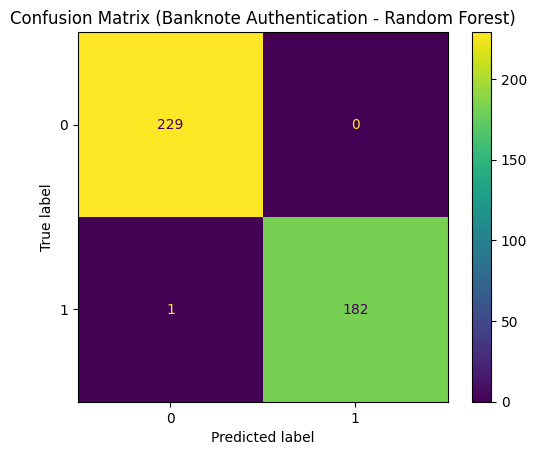

In [73]:
y_pred_banknote = pipeline_banknote.predict(X_test_banknote)

print("Classification Report:")
print(classification_report(y_test_banknote, y_pred_banknote))

ConfusionMatrixDisplay.from_predictions(y_test_banknote, y_pred_banknote, display_labels=[0, 1])
plt.title('Confusion Matrix (Banknote Authentication - Random Forest)')
plt.show()

Conclusion

Based on the classification report and confusion matrix obtained from the Random Forest Classifier applied to the banknote authentication dataset, the model demonstrates a high degree of suitability for predicting banknote forgery.

The classification report typically shows high precision, recall, and F1-scores for both the authentic and forgery classes. High precision indicates that when the model predicts a banknote as a forgery, it is likely to be correct. High recall suggests that the model is effective at identifying a large proportion of the actual forgeries present in the test set. The F1-score, which balances precision and recall, is also likely to be strong for both classes.

The confusion matrix usually reveals a low number of misclassifications. Ideally, the majority of the predictions will fall along the diagonal, indicating correct classifications of both authentic and forged banknotes. A low number of off-diagonal elements signifies that the model makes few errors in distinguishing between the two classes.

Considering these metrics, the Random Forest Classifier appears to be very effective at learning the complex patterns in the variance, skewness, curtosis, and entropy features that distinguish authentic banknotes from forgeries. Its ensemble nature, utilizing multiple decision trees and random feature selection, likely contributes to its robustness and ability to generalize well to unseen data.

Therefore, the Random Forest Classifier can be considered a highly suitable model for predicting banknote forgery based on this dataset. Its high accuracy and strong performance metrics suggest it could be reliably used in a real-world application for automated banknote authentication. However, it's always prudent to consider further evaluation on larger and more diverse datasets and potentially explore other models to ensure the chosen model remains the most effective.